## **MOWNIT**, Jakub Stępień

### Laboratorium 4 - język R

**Instalacja potrzebnych komponentów:**

In [1]:
# install.packages('tidyverse')

### **Zadanie 1:**

W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)).
Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu) **(1p.)**

In [44]:
content <- read.csv("time.csv")

In [45]:
head(content)

,n,times_dot,times_m
,<int>,<dbl>,<dbl>
1,1000,2.177e-06,0.000601304
2,1000,1.940e-07,0.000575422
3,1000,2.430e-07,0.000558586
4,1000,2.550e-07,0.000583577
5,1000,2.130e-07,0.000597401
6,1000,3.330e-07,0.000581045


### **Zadanie 2:**

Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**

In [46]:
library("tidyverse")

# help(aggregate)

In [47]:
aggregated_content1 <- aggregate(times_dot ~ n:times_dot, data=content, FUN="mean")
aggregated_content1$sd <- aggregate(times_dot ~ n:times_dot, data=content, FUN="sd")$times_dot

aggregated_content2 <- aggregate(times_m ~ n:times_m, data=content, FUN="mean")
aggregated_content2$sd <- aggregate(times_m ~ n:times_m, data=content, FUN="sd")$times_m

In [79]:
plot1 <- ggplot(aggregated_content1, aes(n, times_dot)) + geom_point() + ylab("Computing time in seconds")
plot2 <- ggplot(aggregated_content2, aes(n, times_m)) + geom_point() + ylab("Computing time in seconds")

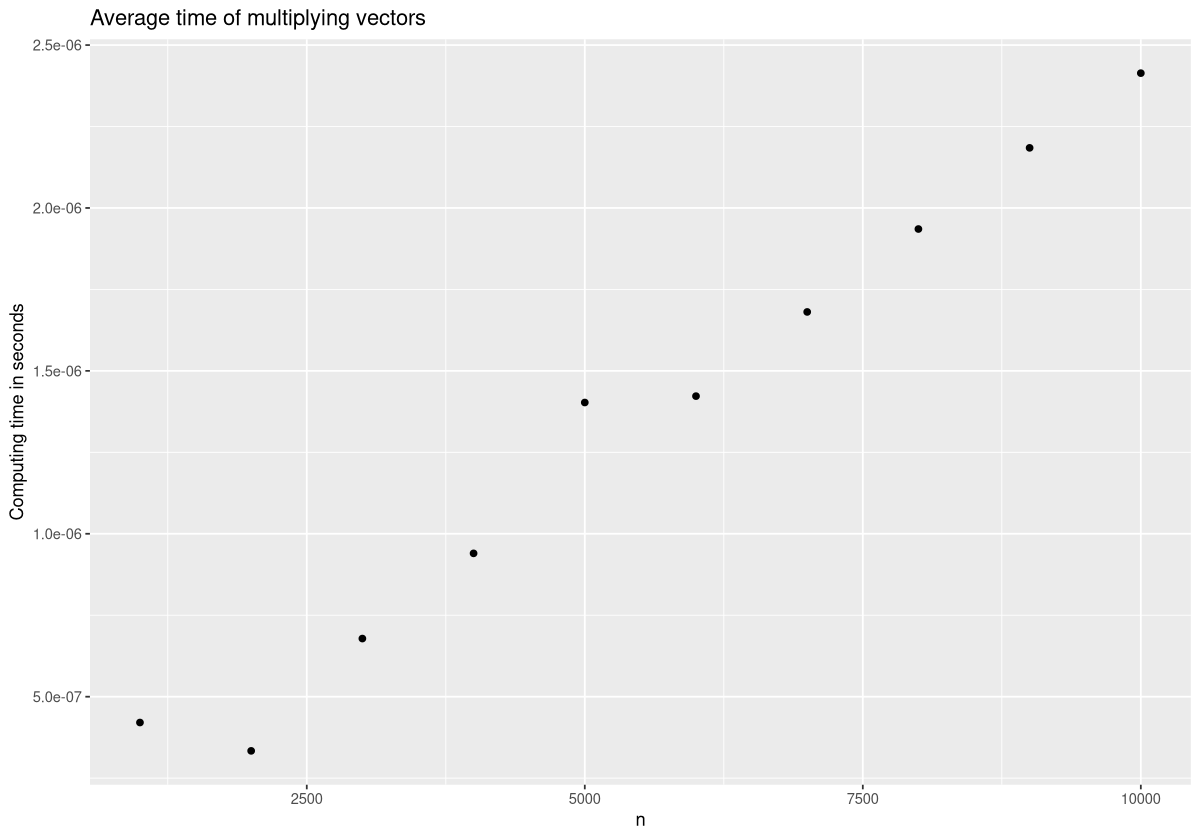

In [80]:
plot1 + ggtitle("Average time of multiplying vectors")

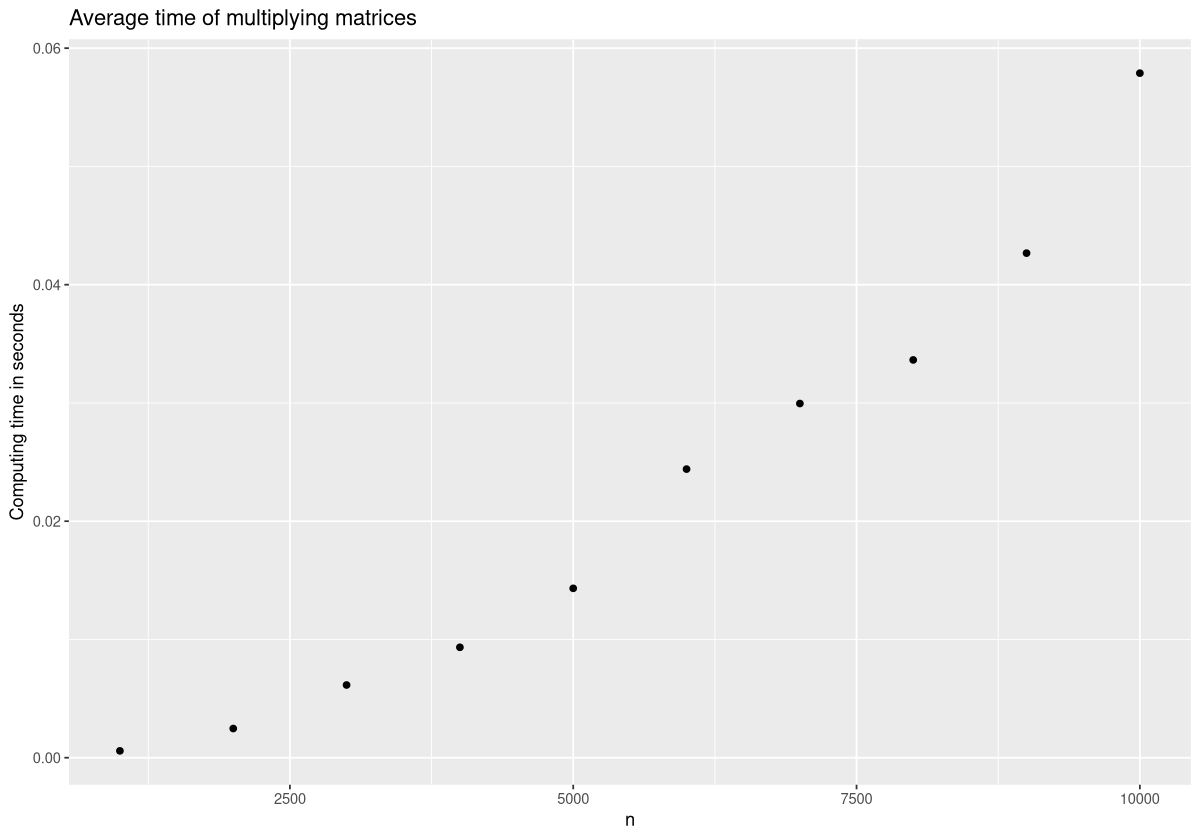

In [81]:
plot2 + ggtitle("Average time of multiplying matrices")

### **Zadanie 3:**

Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów) **(1p.)**

In [87]:
plot3 <- ggplot(aggregated_content1, aes(n, times_dot)) + geom_point() + geom_errorbar(aes(ymin=times_dot - sd, ymax=times_dot + sd, width=100)) + ylab("Computing time in seconds")
plot4 <- ggplot(aggregated_content2, aes(n, times_m)) + geom_point() + geom_errorbar(aes(ymin=times_m - sd, ymax=times_m + sd, width=100)) + ylab("Computing time in seconds")

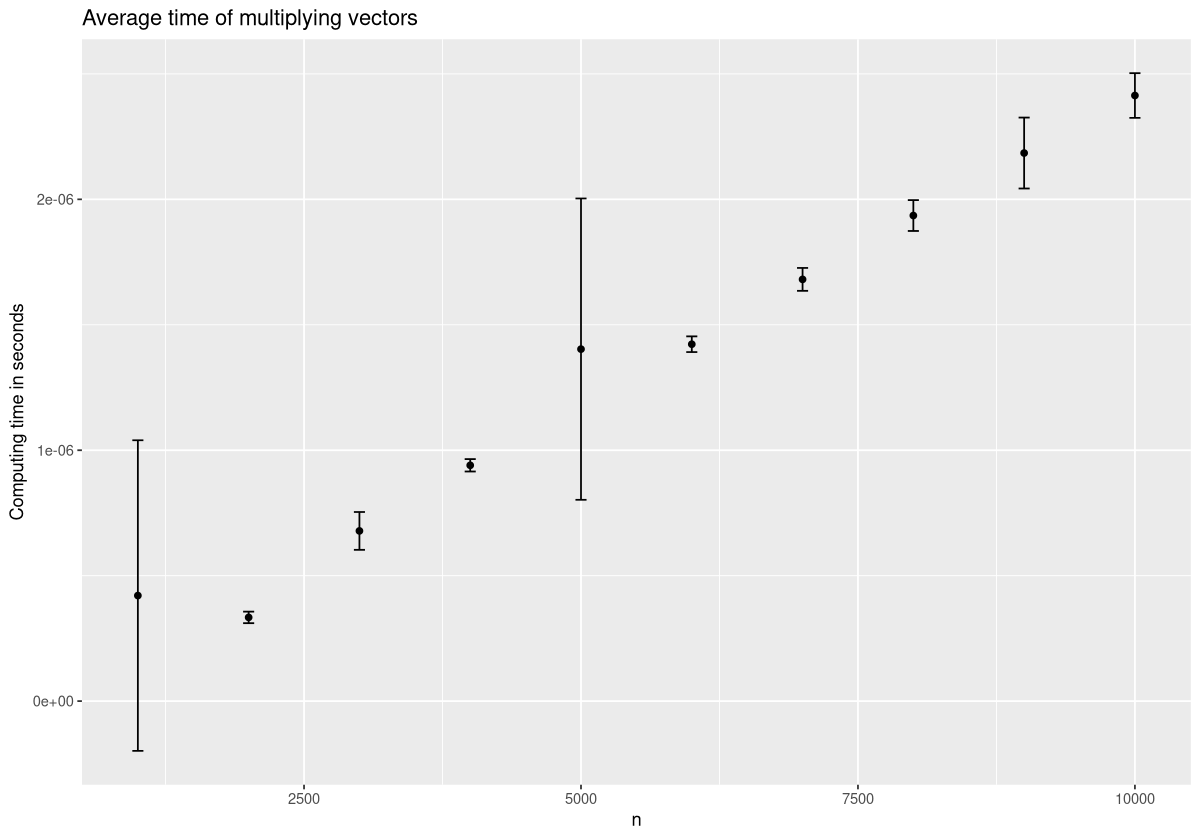

In [88]:
plot3 + ggtitle("Average time of multiplying vectors")

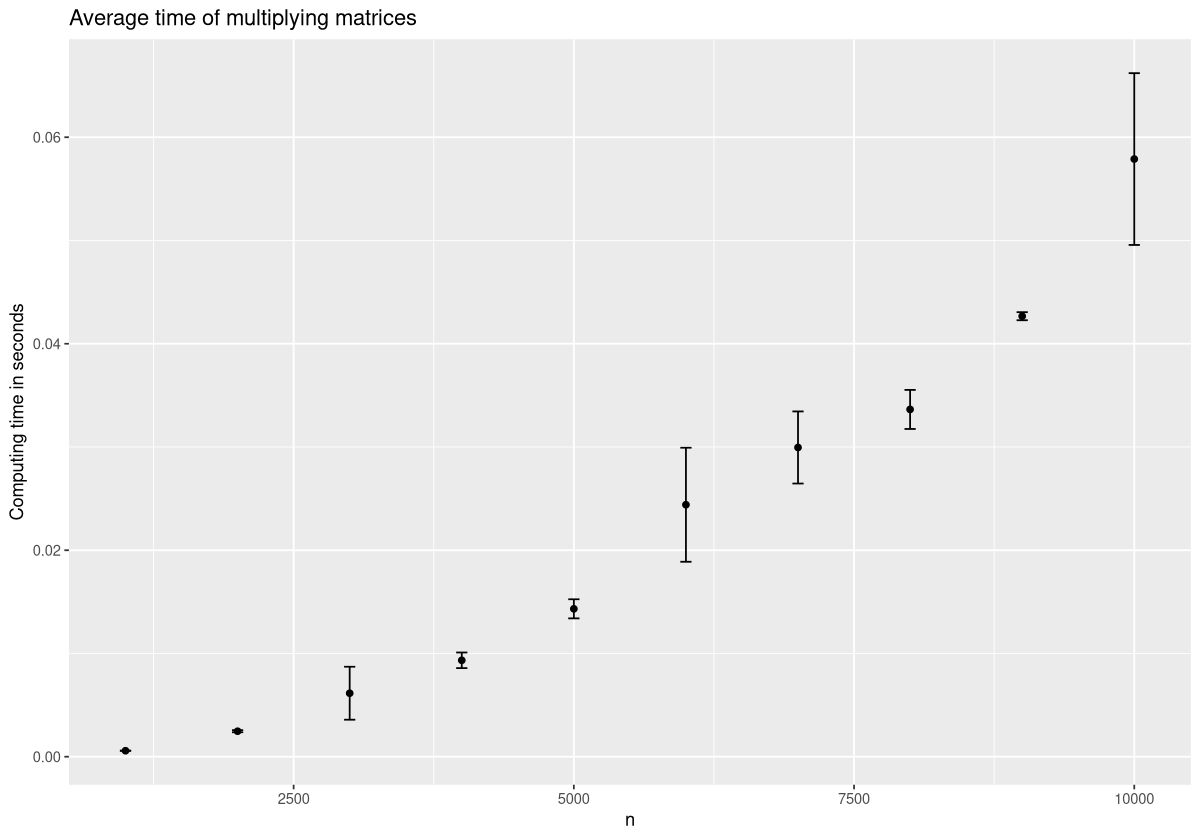

In [89]:
plot4 + ggtitle("Average time of multiplying matrices")

### **Zadanie 4:**

Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu. **(1p.)**

In [90]:
fit <- lm(aggregated_content1$times_dot ~ poly(n, 3, raw=TRUE), data=aggregated_content1)
input_dot = data.frame(n = seq(1, 10000, 1))
input_dot$times_dot = predict(fit, input_dot)

fit <- lm(aggregated_content2$times_m ~ poly(n, 3, raw=TRUE), data=aggregated_content2)
input_matrix = data.frame(n = seq(1, 10000, 1))
input_matrix$times_m = predict(fit, input_matrix)

In [91]:
fit


Call:
lm(formula = aggregated_content2$times_m ~ poly(n, 3, raw = TRUE), 
    data = aggregated_content2)

Coefficients:
            (Intercept)  poly(n, 3, raw = TRUE)1  poly(n, 3, raw = TRUE)2  
             -2.736e-03                2.550e-06                9.565e-11  
poly(n, 3, raw = TRUE)3  
              2.371e-14  


In [95]:
plot5 <- plot3 + geom_line(data=input_dot, aes(n, times_dot)) + ylab("Computing time in seconds")
plot6 <- plot4 + geom_line(data=input_matrix, aes(n, times_m)) + ylab("Computing time in seconds")

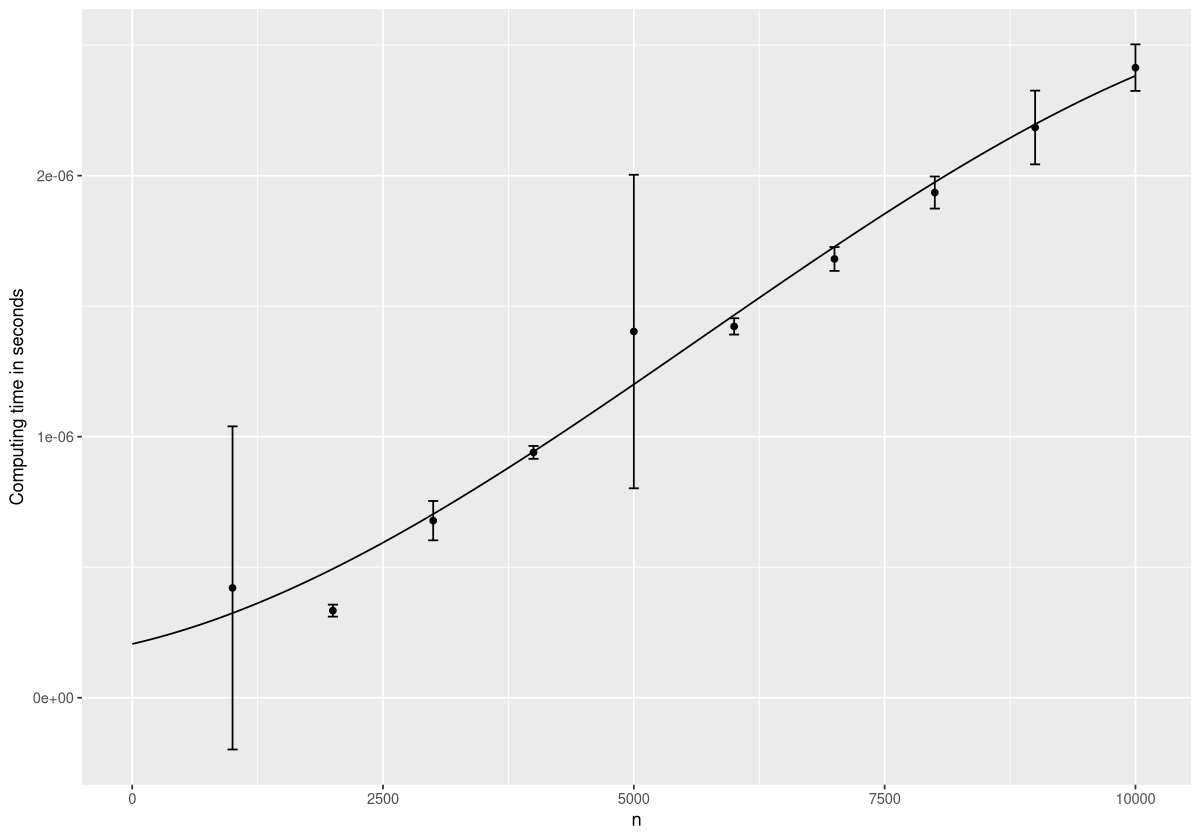

In [96]:
plot5

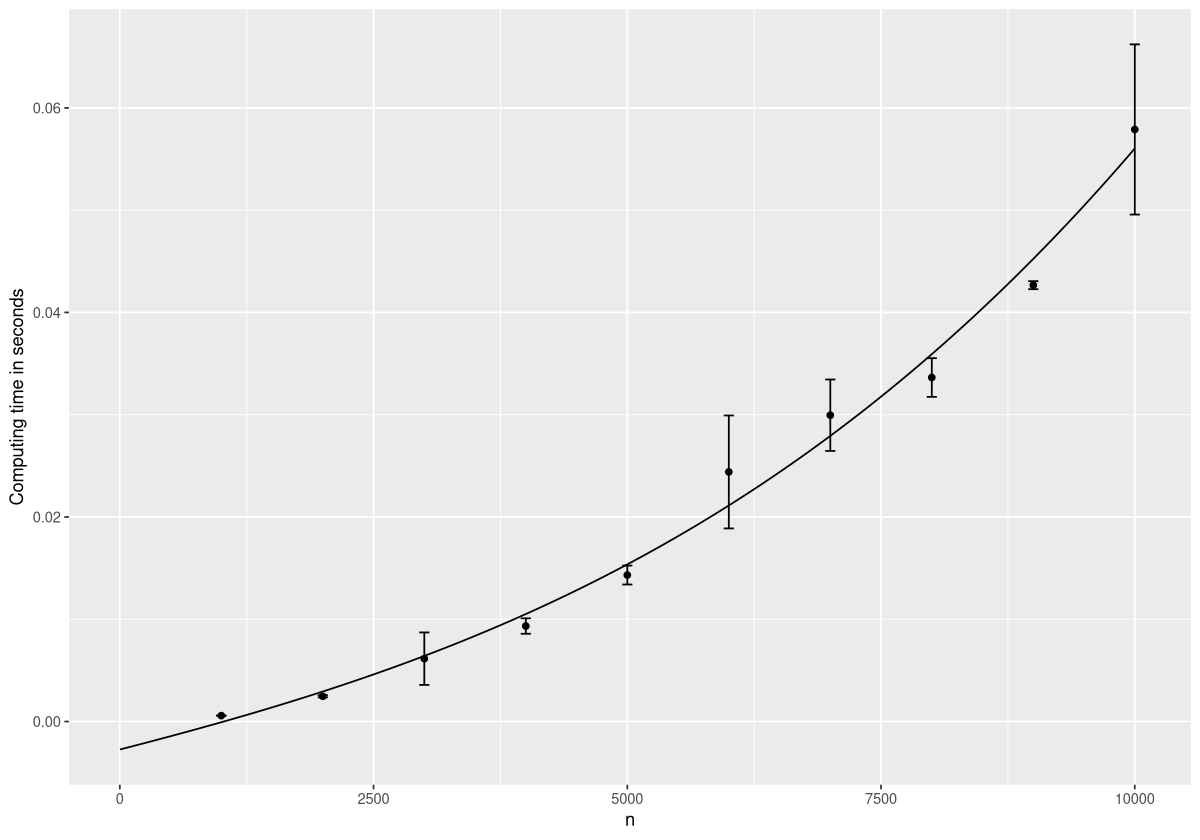

In [97]:
plot6